# DIAMOND PRICE PREDICTION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# UNDERSTANDING THE DATA

In [2]:
df=pd.read_csv("DiamondsPrices.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# DATA PREPROCESSING

In [3]:
df.shape

(53943, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
#in the above output,at "min" row we get x,y,z values are zeroes,which is not possible(because x,y,z are cannot be zero)
#so we have to remove like values(which are also said to be as an outliers)

Min value of "x","y","z" are zeroes this indicates that there are faulty values(outliers)in data that represent dimentionless or 2-dimenstional daimonds.so we need to filter out those as it clearly faulty data points

In [8]:
df=df.loc[(df[['x','y','z']]!=0).all(axis=1)]
df.shape

(53923, 10)

In [9]:
#Dropping the duplicate values form the Dataset

In [10]:
#df=df.drop_duplicates()
#df.shape

# DATA VISUALIZATION

Dividing the data set into catergorical and numerical values separately for visualizing the data 

In [11]:
#cat_data refers to the catagorical data 
#num_data refers to the numerical data
cat_data=['cut','color','clarity']
num_data=['carat','depth','table','x','y','z']

plotting barplot between price and catergorical data for understand the outliers

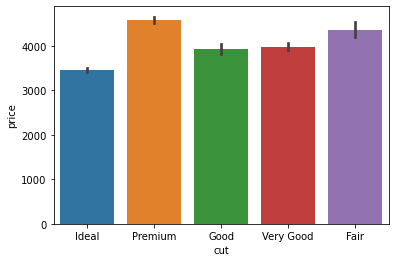

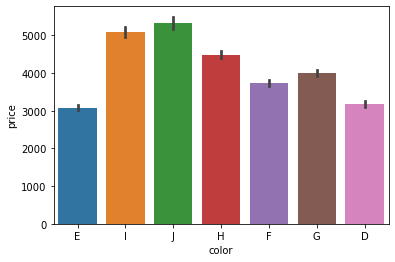

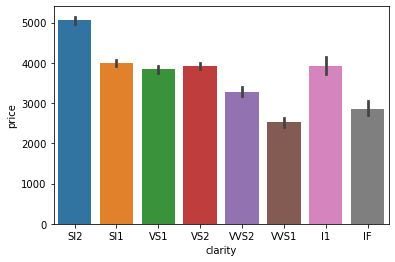

In [12]:
for i in cat_data:
    sns.barplot(x=df[i],y='price',data=df)
    plt.show()

Plotting scatterplot between price and remaing numerical data

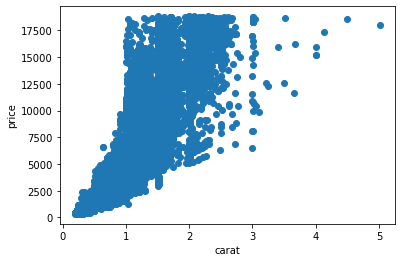

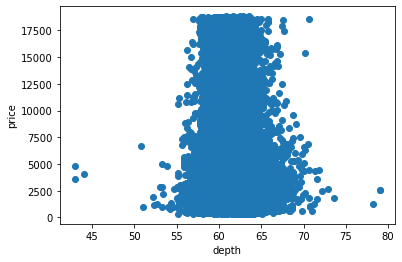

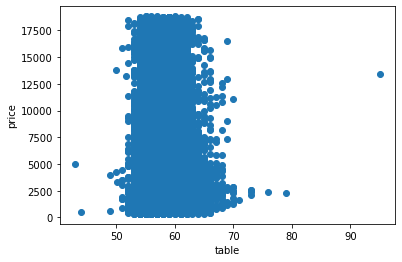

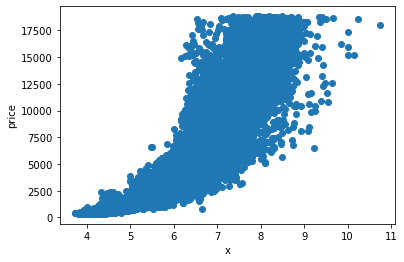

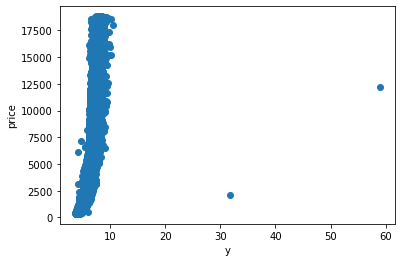

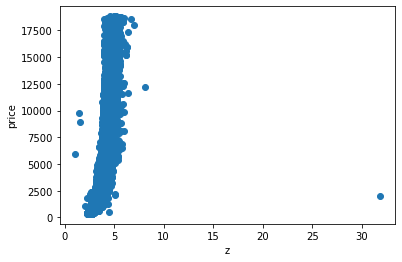

In [13]:
for i in num_data:
    plt.scatter(x=df[i],y='price',data=df)
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()

In [14]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>45)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53908, 10)

<AxesSubplot:>

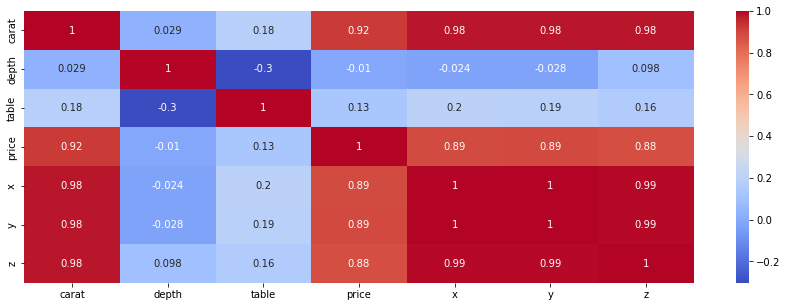

In [15]:
#plotting the correlations among the columns using heatmap
cor=df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(cor,annot=True,cmap='coolwarm')

<AxesSubplot:>

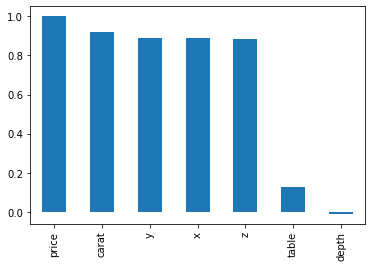

In [16]:
#Finding correlation with price and remaing attributes
cor=df.corr()
cor['price'].sort_values(ascending=False).plot(kind='bar')

From the above plot price column has good correlation with the remaing columns

In [17]:
df["volume"]=df["x"]*df["y"]*df["z"]
df=df.drop(["x","y","z"],axis=1)
df.head(2)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856


# Dealing with the categorical values

Creating Dummy varaibles for Categorical values

In [18]:
np.unique(df['cut'],return_counts=True)

(array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array([ 1603,  4902, 21542, 13781, 12080], dtype=int64))

In [19]:
df['cut'].replace({"Ideal":5, "Premium":4, "Very Good":3,"Good":2,"Fair":1}, inplace=True)
df.head(2)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,E,SI2,61.5,55.0,326,38.202030
1,0.21,4,E,SI1,59.8,61.0,326,34.505856


In [20]:
np.unique(df['color'],return_counts=True)

(array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array([ 6774,  9793,  9537, 11282,  8296,  5419,  2807], dtype=int64))

In [21]:
df['color'].replace({"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7 }, inplace=True)
df.head(2)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,2,SI2,61.5,55.0,326,38.202030
1,0.21,4,2,SI1,59.8,61.0,326,34.505856


In [22]:
np.unique(df['clarity'],return_counts=True)

(array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object),
 array([  737,  1790, 13061,  9184,  8165, 12251,  3654,  5066],
       dtype=int64))

In [23]:
df['clarity'].replace({"SI2":2, "SI1":3, "VS1":5, "VS2":4, "VVS2":6, "VVS1":7, "I1":1,"IF":8}, inplace=True)
df.head(2)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,2,2,61.5,55.0,326,38.202030
1,0.21,4,2,3,59.8,61.0,326,34.505856


In [24]:
#from sklearn.preprocessing import LabelEncoder
#encode = LabelEncoder()
#df['cut'] = encode.fit_transform(df['cut'])
#df['color'] = encode.fit_transform(df['color'])
#df['clarity'] = encode.fit_transform(df['clarity'])

# Splitting the Data into Train and Test sets

In [25]:
#split the data into dependent and independent variables
x = df.iloc[:,[0,1,2,3,4,5,7]]
y = df.iloc[:,6]

In [26]:
x.head(2)

,carat,cut,color,clarity,depth,table,volume
0,0.23,5,2,2,61.5,55.0,38.202030
1,0.21,4,2,3,59.8,61.0,34.505856


In [27]:
y.head(2)

0    326
1    326
Name: price, dtype: int64

In [28]:
#splitting the data into Traing and Testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
x_train.shape

(40431, 7)

In [30]:
y_train.shape

(40431,)

In [31]:
x_test.shape

(13477, 7)

In [32]:
y_test.shape

(13477,)

# MODEL MAKING

##### Model making using Dcision Tree Regresion

In [ ]:
#Importing the decison tree regressor and fitting the data to the model
from sklearn import tree
model = tree.DecisionTreeRegressor().fit(x_train,y_train)

In [ ]:
pred_y1=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print('R2 score of the Decision Tree Regressor is: {:.2%}'.format(r2_score(y_test,pred_y1)))

In [ ]:
model.predict([[0.5,3,2,4,61.5,55.0,79]])

##### Model making using Random Forest Regressor

In [ ]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model1=RandomForestRegressor().fit(x_train,y_train)

In [ ]:
pred_y2=model1.predict(x_test)

In [ ]:
print('R2 score of the Random Forest Regressor is: {:.2%}'.format(r2_score(y_test,pred_y2)))

##### Model making using Linear Regression

In [ ]:
#using Multiple linear Rgression
from sklearn.linear_model import LinearRegression

In [ ]:
model2=RandomForestRegressor().fit(x_train,y_train)

In [ ]:
pred_y3=model2.predict(x_test)

In [ ]:
print('R2 score of the Linear Regression is: {:.2%}'.format(r2_score(y_test,pred_y3)))

In [ ]:
model2.predict([[0.5,3,2,4,61.5,55.0,79]])

In [ ]:
x.head(2)

In [ ]:
model2.predict([[2.3,3, 4, 8, 80,55, 90]])

In [ ]:
r2_score(y_test,pred_y2)

In [ ]:
r2_score(y_test,pred_y3)

predicting values

In [ ]:
model2.predict([[0.23, 5, 2, 1, 61.5, 55, 38.20]])

In [ ]:
model1.predict([[0.23, 5, 2, 1, 61.5, 55, 38.20]])

In [ ]:
model.predict([[0.23, 5, 2, 1, 61.5, 55, 38.20]])

In [ ]:
model1.predict([[0.5,3, 3, 5, 80,55, 90]])

In [ ]:
a=[0.23, 5, 2, 1, 61.5, 55,34]
pred=0
if((0 not in a) and (a[1]>=1 and a[1]<=5) and (a[2]>=1 and a[2]<=7) and (a[3]>=1 and a[3]<=8)):
    pred=model1.predict([a])[0]
    print("The predicted price of the diamond is $",pred+((pred*42)/100))
else:
    print("Invalid properties of diamond")

In [ ]:
b=[0.5,3,2,1,61.5,55,79]
pred=0
if((0 not in b) and (b[1]>=1 and b[1]<=5) and (b[2]>=1 and b[2]<=7) and (b[3]>=1 and b[3]<=8)):
    pred=model1.predict([b])[0]
    print("The predicted price of the diamond is $",pred+((pred*42)/100))
else:
    print("Invalid properties of diamond")

In [ ]:
a=[0.23, 5, 2, 1, 61.5, 55,34]
pred=0
if((0 not in a) and (a[1]>=1 and a[1]<=5) and (a[2]>=1 and a[2]<=7) and (a[3]>=1 and a[3]<=8)):
    pred=model1.predict([a])[0]
    print("The predicted price of the diamond in 2020 $",pred+((pred*14)/100))
    print("The predicted price of the diamond is 2021 $",pred+((pred*28)/100))
    print("The predicted price of the diamond is 2022 $",pred+((pred*42)/100))
else:
    print("Invalid properties of diamond")

In [ ]:
b=[0.5,3,2,1,61.5,55,79]
pred=0
if((0 not in b) and (b[1]>=1 and b[1]<=5) and (b[2]>=1 and b[2]<=7) and (b[3]>=1 and b[3]<=8)):
    pred=model1.predict([b])[0]
    print("The predicted price of the diamond in 2020 $",pred+((pred*14)/100))
    print("The predicted price of the diamond is 2021 $",pred+((pred*28)/100))
    print("The predicted price of the diamond is 2022 $",pred+((pred*42)/100))
else:
    print("Invalid properties of diamond")